# 0. Introdução

A análise abaixo foi feita utilizando dados da jogo de futebol FIFA19, fornecidos pelo site www.kaggle.com

A motivação desse análise é identificar as relação da idade e nacionalidade dos jogadores com suas habilidade e sálario.

Perguntas que tentaremos responder com a análise:
- Qual é a relação da idade com o potencial dos jogadores;
- Qual é a relação da idade com o salario dos jogadores;
- O potencial influência no salario;
- Qual é a Liga de futebol que tem os melhores salários;
- Onde os jogadores com as melhores reputação jogam;
- O salario e o potencial influencia na reputação internacional do jogador;
- Relação entre salario, reputação e idade com a posição do jogador;

Fonte do dataset: https://github.com/yukioandre/lives/tree/master/20200417

# 1. Carregando as Bibliotecas

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.style.use('ggplot')

# 2. Carregando o Dataset

In [3]:
fifa = pd.read_csv('FIFA19.csv')

# 3. Explorando

In [14]:
# Análise inicial
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER,Complete Forward
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM,Distance Shooter
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA,Complete Forward
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE,Goalkeeper
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE,Complete Midfielder


In [5]:
# Alterando o nome da coluna 'Unnamed 0' para 'ID'
fifa.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
0,0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M,LALIGA SANTANDER,Complete Forward
1,1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M,SERIE A TIM,Distance Shooter
2,2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M,LIGUE 1 CONFORAMA,Complete Forward
3,3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,Right,...,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M,PREMIER LEAGUE,Goalkeeper
4,4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,Right,...,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M,PREMIER LEAGUE,Complete Midfielder


In [13]:
# Amostra aleatória
fifa.sample(5)

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause,League,Speciality
1913,1913,Merino,22,Spain,75,84,Real Sociedad,€10M,€22K,Left,...,74.0,65.0,9.0,12.0,9.0,13.0,14.0,€23M,LALIGA SANTANDER,No Speciality
11208,11213,H. Weigelt,20,Germany,64,76,AZ Alkmaar,€725K,€2K,Left,...,68.0,56.0,5.0,10.0,11.0,10.0,7.0,€1.2M,0,No Speciality
5724,5725,S. Mosquera,24,Colombia,69,77,Deportes Tolima,€1.3M,€2K,Right,...,69.0,65.0,13.0,9.0,8.0,9.0,7.0,€2.1M,LIGA DIMAYOR,No Speciality
7986,7989,P. Małecki,29,Poland,67,67,Wisła Kraków,€750K,€3K,Right,...,40.0,44.0,14.0,14.0,13.0,10.0,14.0,€1M,EKSTRAKLASA,No Speciality
6037,6038,Mika,27,Portugal,69,72,Os Belenenses,€875K,€3K,Left,...,10.0,9.0,71.0,66.0,67.0,69.0,71.0,€1.9M,0,Goalkeeper


In [12]:
# Verificando as informações 
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18147 entries, 0 to 18146
Data columns (total 58 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18147 non-null  int64  
 1   Name                      18147 non-null  object 
 2   Age                       18147 non-null  int64  
 3   Nationality               18147 non-null  object 
 4   Overall                   18147 non-null  int64  
 5   Potential                 18147 non-null  int64  
 6   Club                      18147 non-null  object 
 7   Value                     18147 non-null  object 
 8   Wage                      18147 non-null  object 
 9   Preferred Foot            18147 non-null  object 
 10  International Reputation  18147 non-null  float64
 11  Weak Foot                 18147 non-null  float64
 12  Skill Moves               18147 non-null  float64
 13  Work Rate                 18147 non-null  object 
 14  Positi

In [9]:
# Verificando o formato da Dataset
fifa.shape

(18147, 58)

In [10]:
# Vericando as colunas
fifa.columns

Index(['ID', 'Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club',
       'Value', 'Wage', 'Preferred Foot', 'International Reputation',
       'Weak Foot', 'Skill Moves', 'Work Rate', 'Position', 'Jersey Number',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes',
       'Release Clause', 'League', 'Speciality'],
      dtype='object')

In [11]:
# Verificando os tipos das colunas
fifa.dtypes

ID                            int64
Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Potential                     int64
Club                         object
Value                        object
Wage                         object
Preferred Foot               object
International Reputation    float64
Weak Foot                   float64
Skill Moves                 float64
Work Rate                    object
Position                     object
Jersey Number               float64
Joined                       object
Loaned From                  object
Contract Valid Until         object
Height                       object
Weight                       object
Crossing                    float64
Finishing                   float64
HeadingAccuracy             float64
ShortPassing                float64
Volleys                     float64
Dribbling                   float64
Curve                       

In [15]:
# Contagem dos Nulos
fifa.isna().sum()

ID                             0
Name                           0
Age                            0
Nationality                    0
Overall                        0
Potential                      0
Club                           0
Value                          0
Wage                           0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Position                       0
Jersey Number                  0
Joined                      1493
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
Crossing                       0
Finishing                      0
HeadingAccuracy                0
ShortPassing                   0
Volleys                        0
Dribbling                      0
Curve                          0
FKAccuracy                     0
LongPassing                    0
BallContro

In [16]:
# Resumo estátistico
fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,...,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000,18147.000000
mean,9089.239599,25.121122,66.253926,71.324076,1.113297,2.947154,2.361492,19.546096,49.738414,45.550229,...,48.546371,58.651127,47.286053,47.701879,45.666336,16.616906,16.393839,16.233041,16.389651,16.712019
std,5257.923360,4.669796,6.913320,6.132286,0.394150,0.660498,0.756274,15.947765,18.364255,19.527445,...,15.703113,11.437138,19.900450,21.663630,21.287961,17.698612,16.909971,16.504103,17.037031,17.957521
min,0.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4536.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9076.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13662.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# 4. Análise Exploratória

## Verificando a média da idade dos jogadores

In [6]:
idade_media = fifa.Age.mean()
print(f'{idade_media:.2f}')

25.12


## Analisando como está a distribuição da idades.

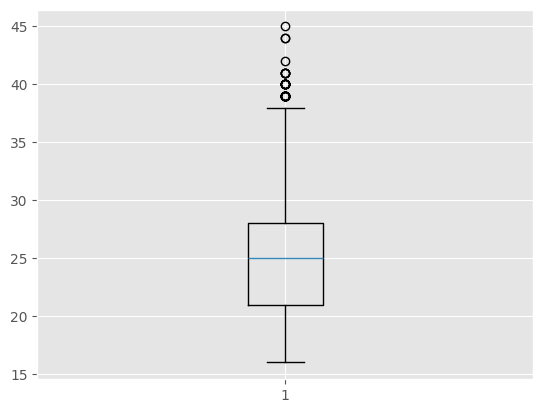

In [134]:
plt.boxplot(x='Age', data=fifa);

Com isso podemos notar alguns pontos:
- A maioria dos jogadores possuem menos de 25 anos.
- O jogador mais velho possui 45 anos.
- O mais novo 16 anos.

## Analisar o potencial médio do jogadores.

In [29]:
media_potential = fifa.Potential.mean()
print(f'Pontecial Médio = {media_potential}')

fifa['media_potential'] = np.where(fifa['Potential']>media_potential, 1, 0)
jogadores_acima_media = fifa.query("media_potential == 1").value_counts().sum()
jogadores_abaix_media = fifa.query("media_potential == 0").value_counts().sum()


print(f'Numero de jogadores com o potencial acima da media: {jogadores_acima_media}')
print(f'Numero de jogadores com o potencial abaixo da media: {jogadores_abaix_media}')


Pontecial Médio = 71.32407560478316
Numero de jogadores com o potencial acima da media: 7496
Numero de jogadores com o potencial abaixo da media: 9158


## Analisando como está a distribuição do potencial.

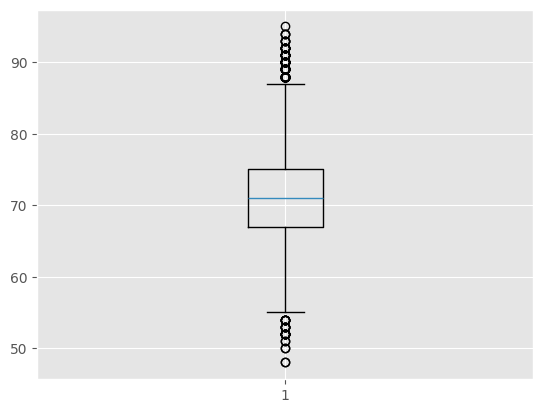

In [21]:
plt.boxplot(x='Potential', data=fifa);

Analisando a o Potencial podemos perceber:
- Mais da metade possui um potencial abaixo do 70;
- O ponto máximo do potencial é por volta de 94;

## Agora, vamos analisar a Idade com o Potencial.

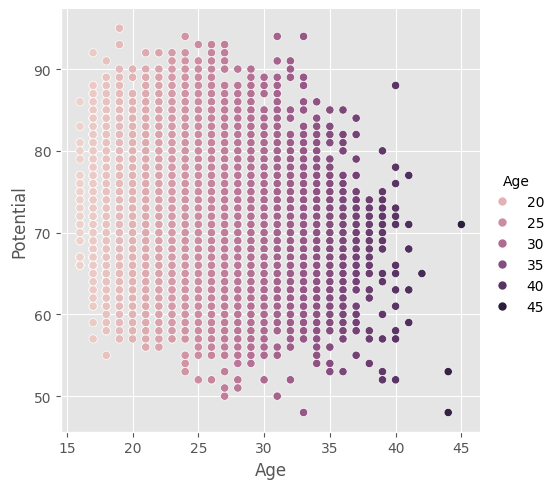

In [26]:
sns.relplot(x='Age', y='Potential', data=fifa, hue='Age');

Com isso concluimos que essas variáveis possuem relações como:
- Jogadores mais velhos possuem o potencial menor;
- Quanto mais jovem o jogadors maior será seu potencial;

## Agora vamos analisar o salario dos jogadores.

Primeiro precisamos transformar a coluna salario em numeros, pois ela está como string e com isso não poderemos realizar operação matemáticas com ela.


In [103]:
# Alterar o salario para numero

def converte_wage(value):
    '''
    Essa função está alterando os valores para floats, ou seja, tirando alguns caracteres que
    não podem ser transformados em numero. Depois disso transforma o salario em numero de acordo
    a remuneração do jogador.
    '''
    value_2 = value.replace('€','')
    if 'M' in value_2:
        value_2 = value_2.replace('M','')
        return float(value_2)*1000000
    elif 'K' in value_2:
        value_2 = value_2.replace('K','')
        return float(value_2)*1000

fifa['Wage'] = fifa['Wage'].apply(converte_wage);

Agora vamos ver a média dos salarios

In [ ]:
salario_media = fifa.Wage.mean()
print(f'{salario_media:.2f}')

In [48]:
jogadores_salario_alto = fifa.query("Wage  > @salario_media").value_counts().sum()
jogadores_salario_baixo = fifa.query("Wage < @salario_media").value_counts().sum()

print(f'Numero de jogadores com o salario acima da media: {jogadores_salario_alto}')
print(f'Numero de jogadores com o salario abaixo da media: {jogadores_salario_baixo}')


Numero de jogadores com o salario acima da media: 3818
Numero de jogadores com o salario abaixo da media: 12836


Percebemos que a grande maioria dos jogadores não possuem um salario altos. 

### Agora vamos ver se a Idade tem alguma relação com isso.

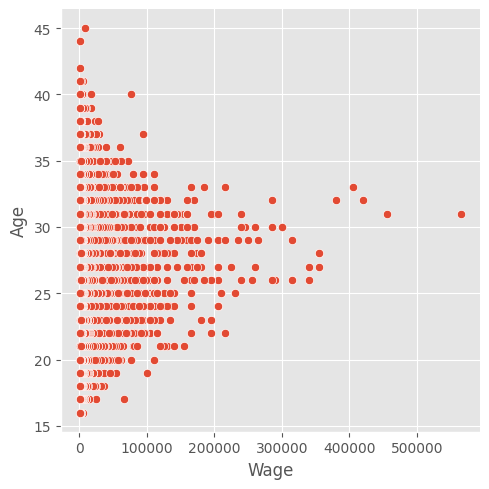

In [120]:
sns.relplot(x='Wage', y='Age', data=fifa,);

Com isso percebemos que:
- Jogadores muitos novos ou muito velhos possuem um salario relativamente baixo;
- A faixa etária mais bem remunerada é entre 25 e 35.

### Depois vamos ver se o potencial pode influenciar no salario.

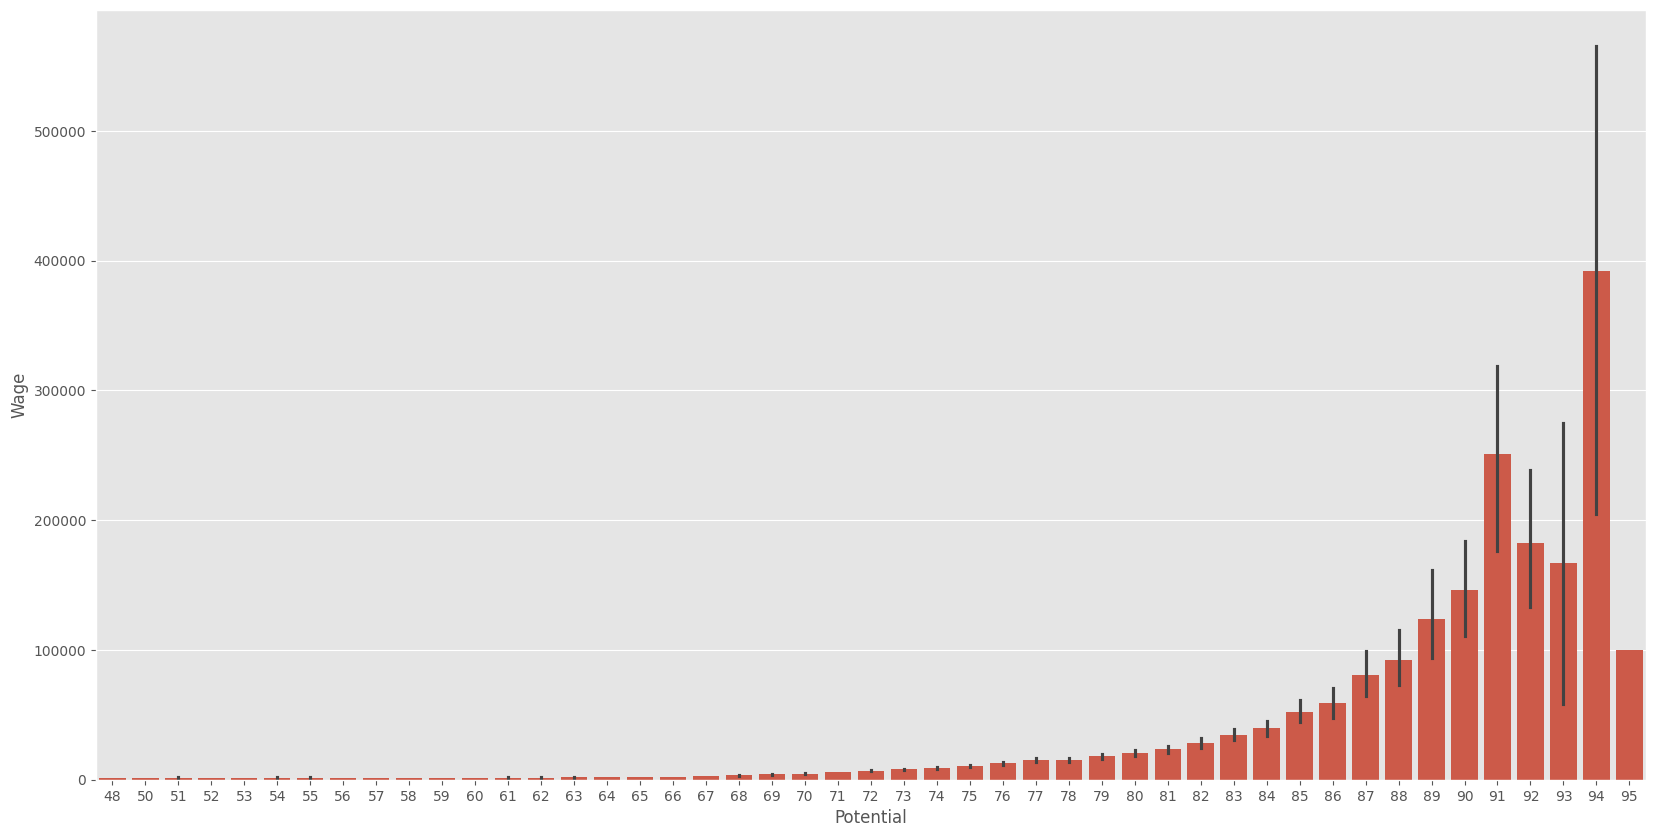

In [131]:
plt.figure(figsize=(20,10))
sns.barplot(x='Potential', y='Wage', data=fifa,);

Analisando o gráfico acima, percebe-se que quanto maior o potencial maior será o salário.

## Agora vamos ver se quais são as ligar que pagam melhor os seus jogadores.

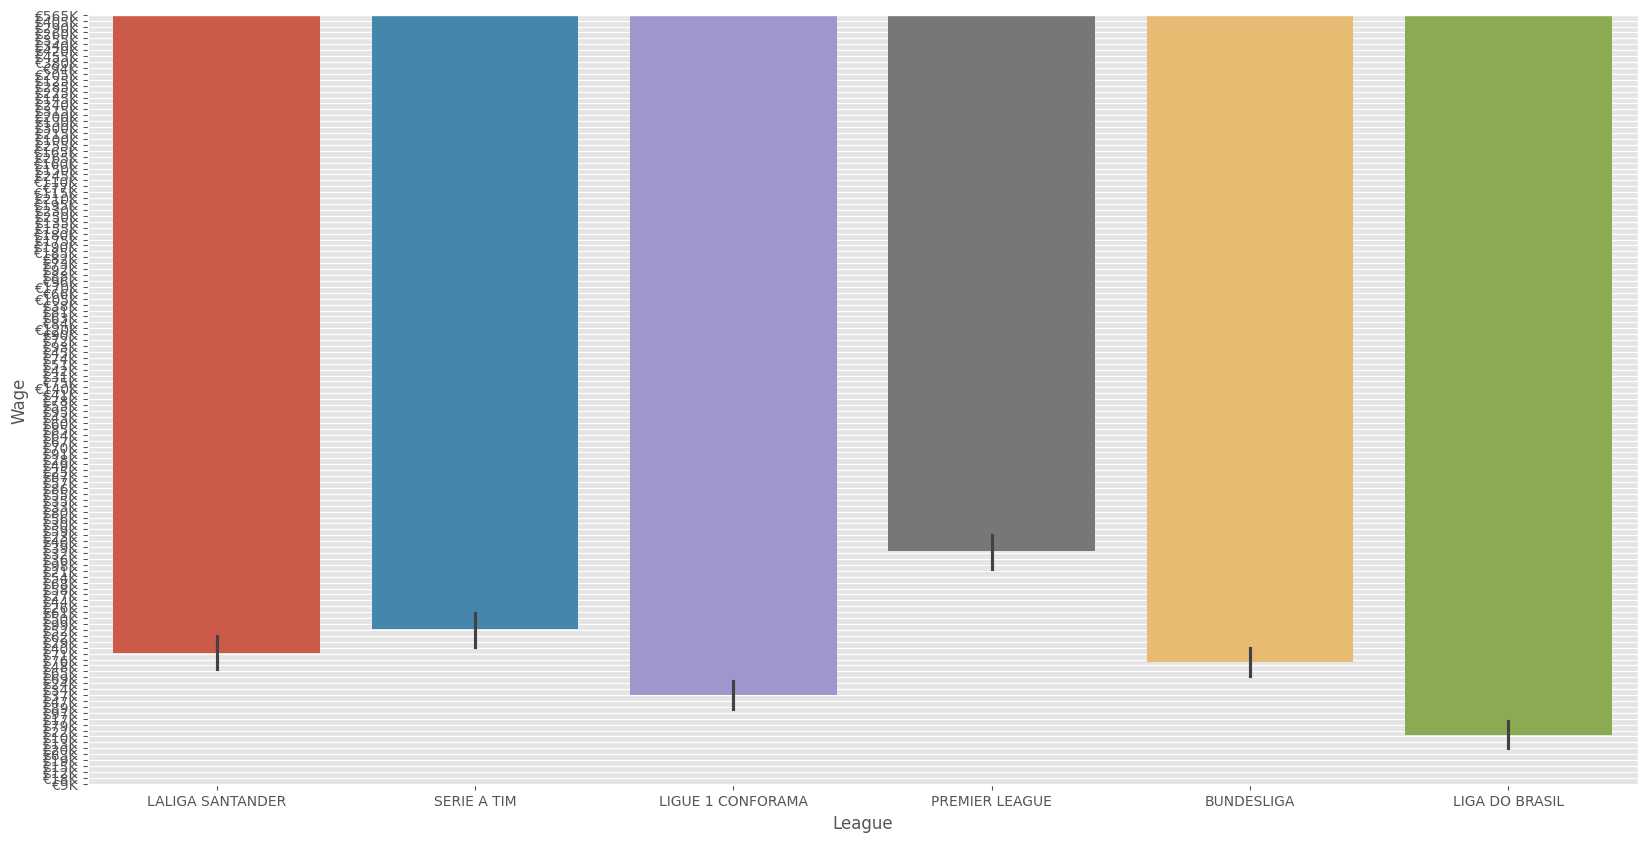

In [22]:
ligas = ['LALIGA SANTANDER', 'SERIE A TIM', 'LIGUE 1 CONFORAMA', 'PREMIER LEAGUE', 'BUNDESLIGA', 'LIGA DO BRASIL']
principais_ligas = fifa[fifa['League'].isin(ligas)]

plt.figure(figsize=(20,10))
sns.barplot(x='League', y='Wage', data=principais_ligas, hue='League');

Analisando esse gráfico das principais ligas do mundo, percebemos que a liga que possue os maiores salário é a Premier League.

### Agora vamos ver quais são as ligas que os jogadores com maior reputação jogam.

Primeiro vamos ver a media da reputação internacional dos jogadores e quanto estão acima e abaixo dessa média.

In [86]:
media_reputacao_internacional = fifa['International Reputation'].mean()
print(f'{media_reputacao_internacional:.2f}')

1.11


In [90]:
jogadores_reputacao_alto = fifa[fifa['International Reputation'] > media_reputacao_internacional]
jogadores_reputacao_baixo = fifa[fifa['International Reputation'] < media_reputacao_internacional]

print(f'Numero de jogadores com a reputação acima da media: {len(jogadores_reputacao_alto)}')
print(f'Numero de jogadores com a reputação abaixo da media: {len(jogadores_reputacao_baixo)}')

Numero de jogadores com a reputação acima da media: 1627
Numero de jogadores com a reputação abaixo da media: 16520


De novo percebemos que a grande maioria possuem uma reputação baixo.

### Agora relacionando a Liga com a Reputação.

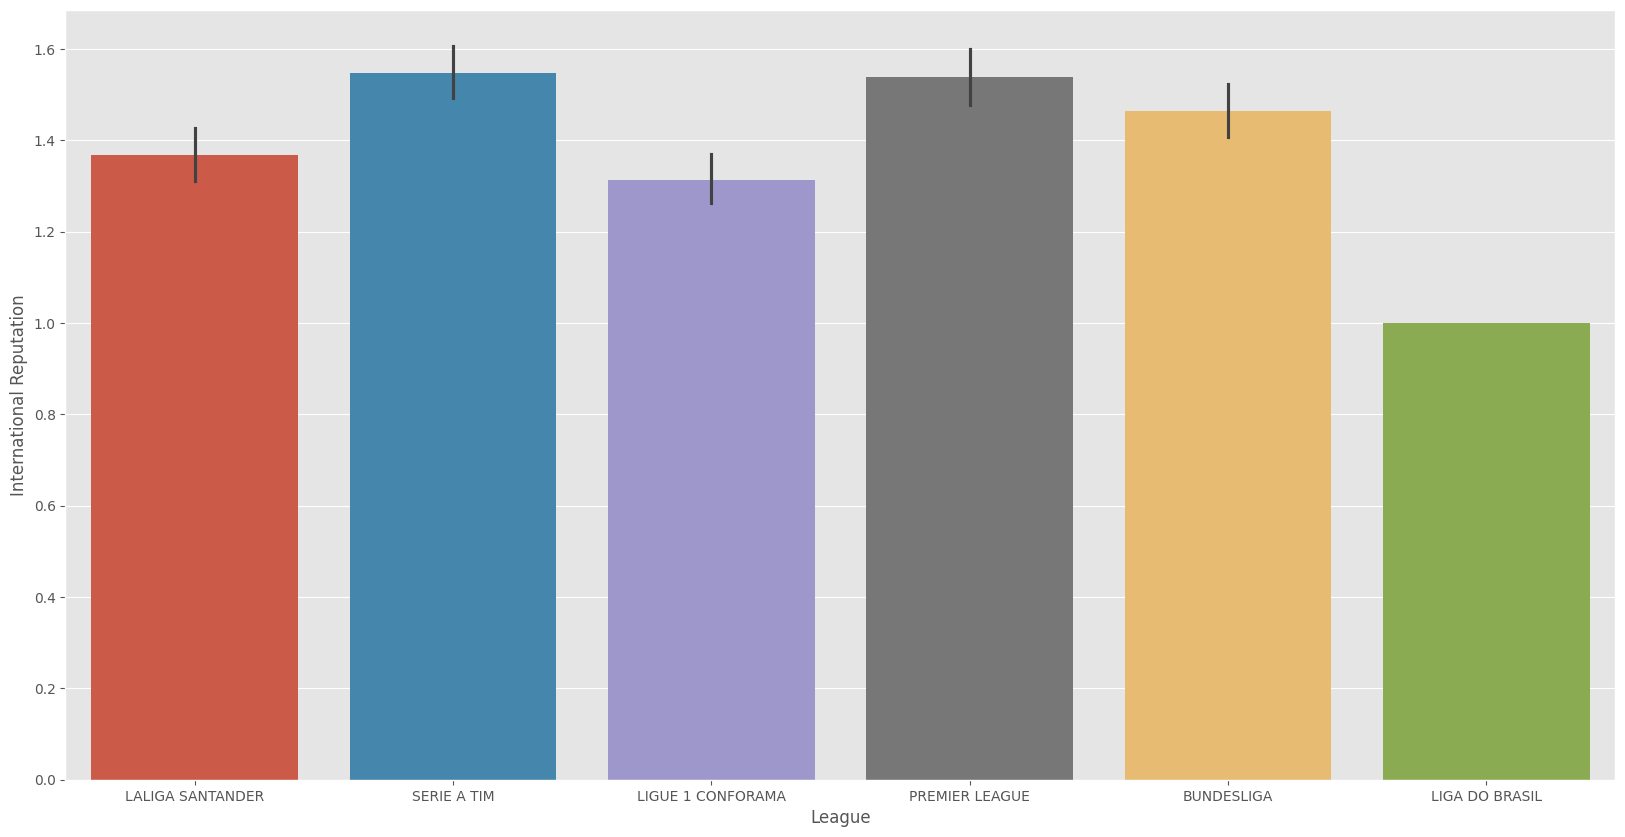

In [23]:
plt.figure(figsize=(20,10))
sns.barplot(x='League', y='International Reputation', data=principais_ligas, hue='League');

Analisando esse gráfico percebemos que, os jogadores com a melhores reputação estão na principais ligas da Europa.

### Vamos ver se essa reputação influencia no salário

E com isso chegamos a conclusão de que realmente influecnia, onde quanto maior a reputação do jogador maior sera seu salário.

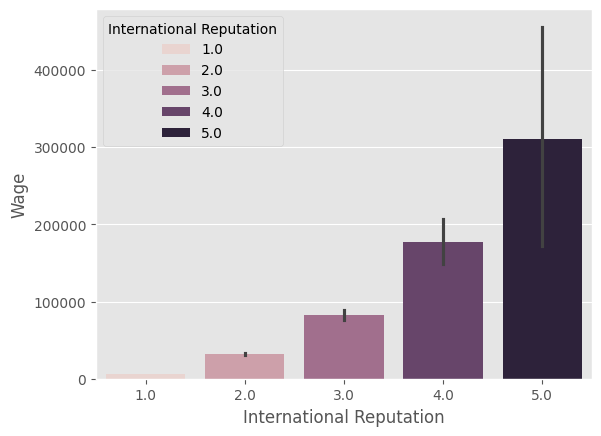

In [126]:
sns.barplot(y='Wage', x='International Reputation', data=fifa, hue='International Reputation');

Agora analisando esse gráfico chegamos a conclusão de quanto maior a reputação do jogador, maior será seu salário

### Vamos analisar também o Potencial do jogador com a sua reputação

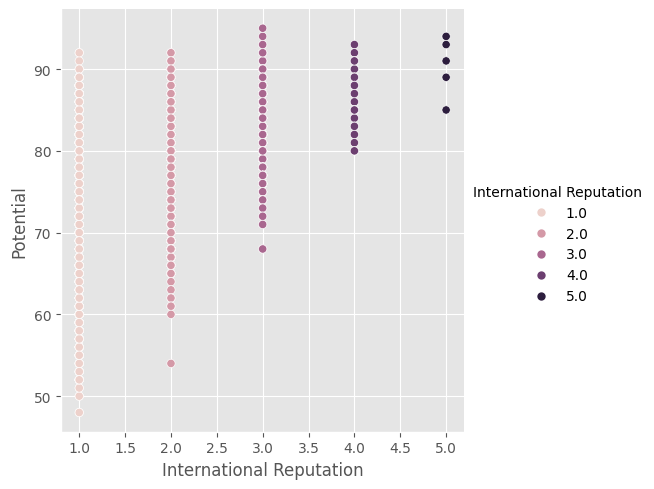

In [123]:
sns.relplot(y='Potential', x='International Reputation', data=fifa, hue='International Reputation');

Com isso notamos que, mesmo com a reputação baixa o jogador pode ter um potencial alto, porem quanto maior a reputação, mais provavél que o 
jogador possua um potencial maior.

### Outro ponto legal de ser levar em conta seria se, a idade influencia na reputação.

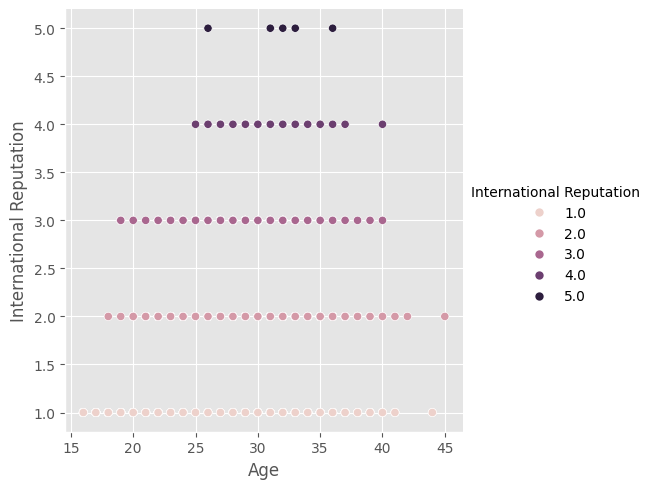

In [129]:
sns.relplot(x='Age', y='International Reputation', data=fifa, hue='International Reputation');

Esse gráfico mostra que, a reputação não depende da idade, 
mas quanto maior a reputação do jogador, 
nota-se que a faixa etária está entre 25 e 35 anos.

### Agora vamos analisar o salario, reputação e idade com a posição dos jogadores.

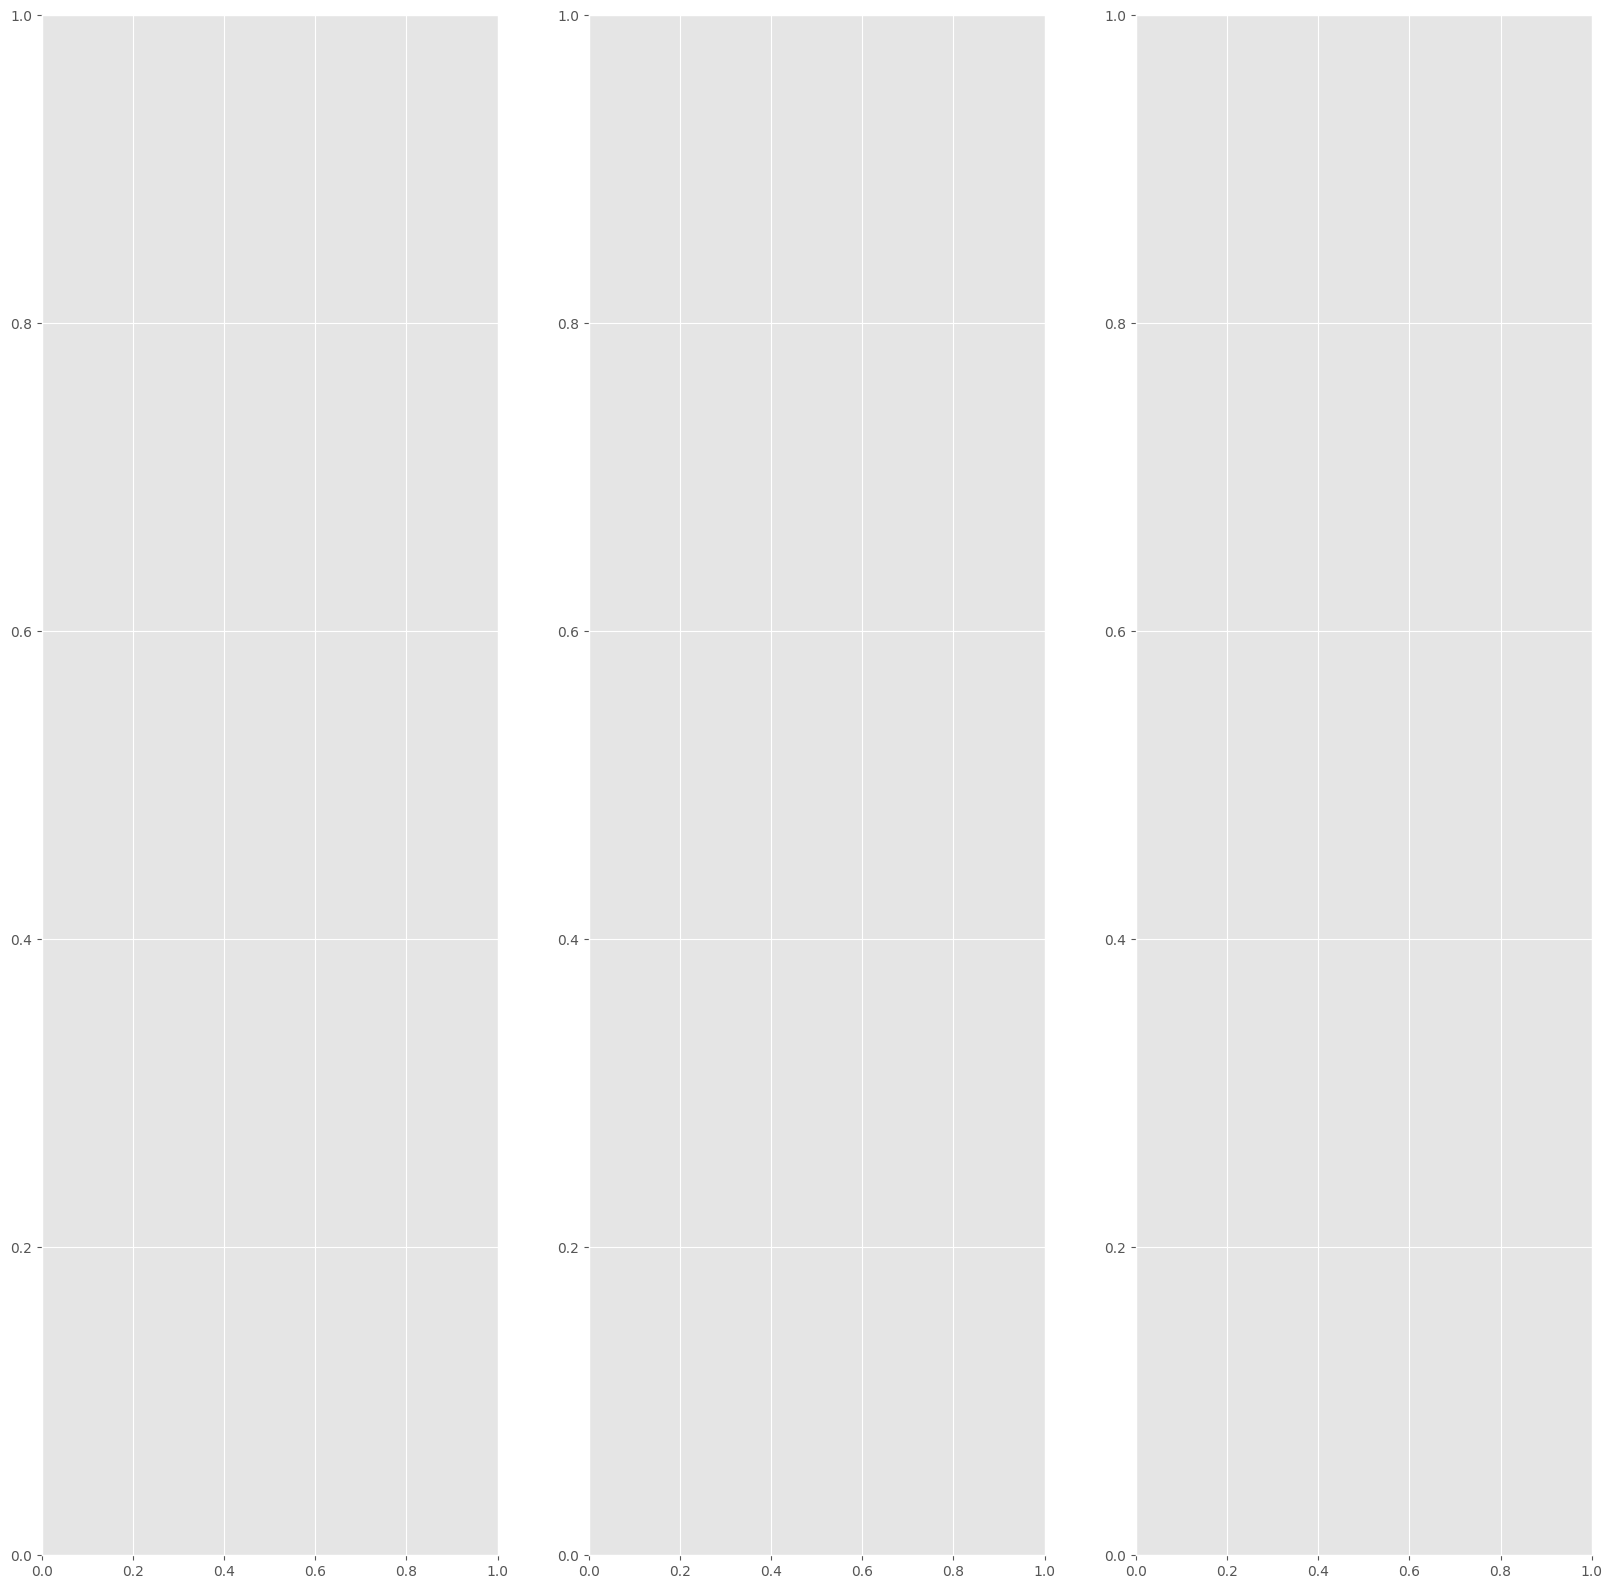

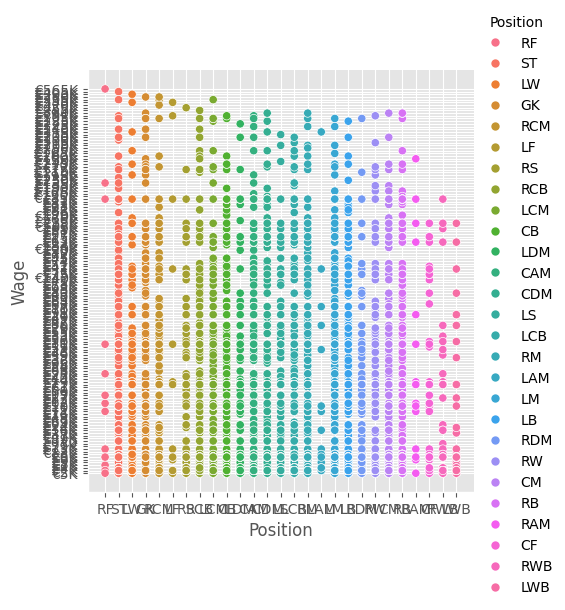

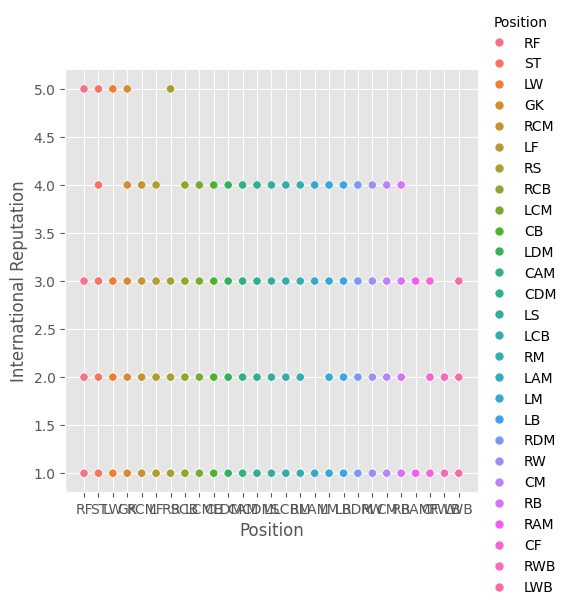

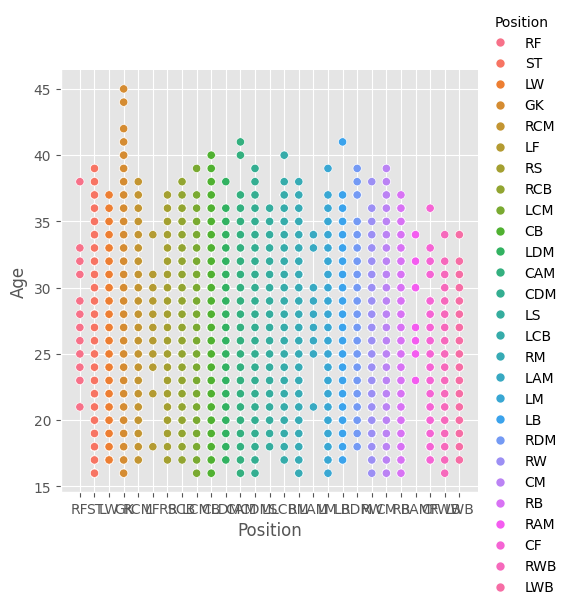

In [25]:
fig = plt.figure(figsize=(20,20))

ax1 = fig.add_subplot(1,3,1) 
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)


ax1 = sns.relplot(y='Wage', x='Position', data=fifa, hue='Position');
ax2 = sns.relplot(y='International Reputation', x='Position', data=fifa, hue='Position');
ax3 = sns.relplot(y='Age', x='Position', data=fifa, hue='Position');

# 5. Conclusão

Após analisar alguns dados do dataset Fifa, podemos concluir alguns pontos como:
- A maioria dos jogadores são novos;
- A distribuição do potencial está equilibrada;
- Quanto mais novo jogador, maior será a probabilidade dele ter um bom potencial;
- A maioria dos jogadores possuem um sálario abaixo da média;
- E quanto maior a idade, o potencial é a reputação, maior será o salário do jogador;
- A liga de Futebol Italiana (Seria TIM a), tem o maior numero de jogadores com uma boa reputação;
- E a liga que melhor paga os jogadores é a Premier League;
- O potencial e a idade não influenciam diretamente na reputação do jogadore, porem quanto maior, mais provavel
do jogador ter uma boa reputação;